    NAMA :PITRIA PUTRI SARI
    NIM  :09011281924143
    KELAS:SK5 REGULER 2019
    
    TUGAS PROJEK ARTIFICAL INTELLIGENCE

# DETEKSI BUAH-BUAHAN MENGGUNAKAN DEEP LEARNING 


Program ini saya buat untuk memenuhi UAS mata kuliah Artifical Intelligence (AI).Program ini bertujuan untuk mengetahui cara kerja dan merancang Deep Learning dengan menggunakan metode CNN untuk mendeteksi jenis buah-buahan.

## Deep Learning 
Deep Learning adalah kelas algoritma Machine Learning. yang menggunakan banyak algoritma lapisan yang berisi unit pemrosesan nonlinier, contoh lapisan adalah pada gambar di bawah ini. 

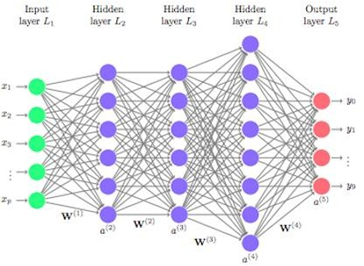

## Convolutional Neural Network (CNN)
Convolutional Neural Network (CNN) adalah pengembangan dari Multilayer Perceptron (MLP) yang termasuk dalam neural network bertipe feed forward (bukan berulang). Convolutional Neural Network adalah neural network yang didesain untuk mengolah data dua dimensi.CNN digunakan untuk menganalisis gambar visual, mendeteksi dan mengenali objeck pada image, yang merupakan vektor berdimensi tinggi yang akan melibatkan banyak parameter untuk mencirikan jaringan. 

## Buah buahan
Dari sudut ilmu botani, buah-buahan bisa diartikan sebagai struktur organ pada tumbuhan berbunga yang merupakan perkembangan lanjutan dari bakal buah yang digunakan sebagai tempat menyimpan hasil fotosintesis yang dilakukan dibagian daun. Biasanya buah juga dijadikan sebagai wadah untuk membungkus dan melindungi biji agar tanaman tersebut bisa melakukan proses regenerasi
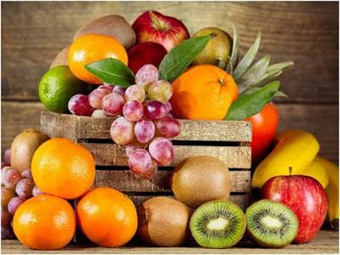

## DESKRIPSI PENGERJAAN

Deskripsi pengerjaan meliputi Dataset, Data training , Penjelasan Program, tampilan deteksi dan perhitungan akurasi deteksi.

### Dataset
Data set diperlukan untuk pengujian data training, yaitu kumpulan gambar yang akan di training untuk pengenalan gambar. Dataset itu sendiri diambil dari https://github.com/Horea94/Fruit-Images-Dataset. Total dataset yaitu sebanyak
90.483 seperti pada gambar 3.1, yang terbagi menjadi 2 kategori yaitu sebanyak 67.692 gambar sebagai data training lalu sebanyak 22.688 sebagai data tes. Jenis dari buah – buahan itu sendiri terdapat 131 jenis. Ukuran dari gambar adalah 100x100 pixels.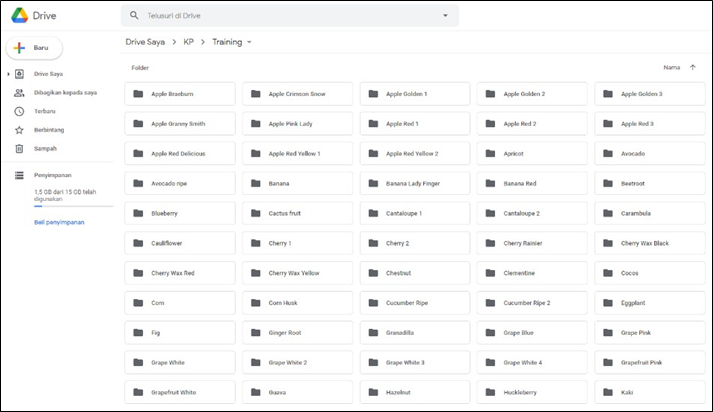

            Gambar 3.1 Dataset training di google drive


### Data Training

Data training sebanyak 67.692 gambar akan dijadikan model H5 file, yang nantinya pada saat deteksi buah – buahan akan di load terlebih dahulu untuk modelnya. File yang berisi data training tersebut dinamai dengan ‘Fruits_360.h5’.


## Penjelasan Program
Program Dijalankan pada Jupyter notebook dengan pemrograman Bahasa phyton, akan dijelaskan jalannya program.

### Import Library

Ada beberapa library yang digunakan dalam mendukung kelancaran jalannya program ini .

- Bagian pertama hanya menguji apakah ada Deprecated atau keusangan. 
- Pada bagian kedua yaitu import fungsi Load Model dan image yang nanti nya digunakan untuk load data model dari library keras yang memang library keras berguna untuk menyusun atau meproses dataset. Lalu import library numpy yang berguna untuk proses perhitungan matriks dan import matplotlib.pyplot yang berguna untuk grafik 2D.

In [20]:
def no_warn():
    import warnings

    def fxn():
      warning.warn("deprecated",DeprecationWarning)

    with warnings.catch_warning(record=True) as w:
      # Cause all warnings to always be tringgered.
      warnings.simplefilter("always")
      # Tringger a warning.
      fxn()
      # Verify some things
      assert len(w) == 1
      assert issubclass(w[-1].catagory, DeprecationWarning)
      assert "deprecated" in str(w[-1].message)

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
no_warn()

### Load model 
Load model dari file ‘Fruits_360.h5’yang berisikan data dari gambar – gambar yang telah di training. File juga pastikan sudah di upload ke Google drive,Pada Google drive dan file diakses sesuai jalur direktori yang telah diubah 

In [ ]:
model = load_model('Fruits_360.h5')
no warn()

### Model Summary 
hasil output dibawah ini merupakan ringkasan dari proses layer Deep Learning menggunakan metode CNN (Convolutional Neural Network)

In [ ]:
model.summary()

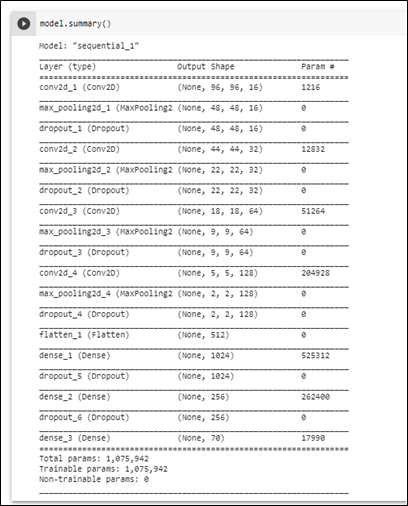

## Label Nama Buah 

In [7]:
class Fruit:

  def __init__(self, img_dir = ''):
    self.img_dir = img_dir
    self.cnt = 0
    self.batch_holder = None
    self.model = load_model('Fruits_360.h5')
    self.Label_dict = label = {'Apel (Braeburn)': 0,
        'Apel emas': 1,
        'Apel (Granny Smith)': 2,
        'Apel Merah': 3,
        'Aprikot': 4,
        'Alpukat': 5,
        'Alpukat Matang': 6,
        'Pisang': 7,
        'Pisang (Lady Finger)': 8,
        'Pisang Merah': 9,
        'Buah Kaktus': 10,
        'Blewah 1': 11,
        'Blewah 2': 12,
        'Belimbing': 13,
        'Ceri 1': 14,
        'Ceri warna Hitam': 15,
        'Ceri warna merah': 16,
        'Ceri warna Kuning': 17,
        'Kacang Kastanye': 18,
        'Jeruk Clementine': 19,
        'Kelapa': 20,
        'Kurma': 21,
        'Anggur Biru': 22,
        'Anggur Pink': 23,
        'Anggur Putih': 24,
        'Jeruk Limau Pink': 25,
        'Jeruk Limau Putih': 26,
        'Jambu': 27,
        'Kacang Hazelnut': 28,
        'Huckleberry': 29,
        'Kaki': 30,
        'Kiwi': 31,
        'Kumkuat': 32,
        'Lemon': 33,
        'Lemon Meyer': 34,
        'Jeruk Nipis': 35,
        'Leci': 36,
        'Jeruk Mandarin': 37,
        'Mangga': 38,
        'Manggis': 39,
        'Melon (Piel de Sapo)': 40,
        'Mulberry': 41,
        'Nektarin': 42,
        'Jeruk Orange': 43,
        'Pepaya': 44,
        'Markisa': 45,
        'Persik': 46,
        'Persik 2': 47,
        'Persik Datar': 48,
        'Pir': 49,
        'Pir Kaisar': 50,
        'Nanas': 51,
        'Nanas Kecil': 52,
        'Naga Merah': 53,
        'Prem': 54,
        'Prem 2': 55,
        'Prem 3': 56,
        'Delima': 57,
        'Jeruk Limau (Pomelo Sweetie)': 58,
        'Rambutan': 59,
        'Rasberi': 60,
        'Anggur Merah': 61,
        'Stoberi': 62,
        'Stoberi wedge': 63,
        'Tomat 1': 64,
        'Tomat 2': 65,
        'Tomat 4': 66,
        'Tomat Ceri Merah': 67,
        'Tomat Merah Marun': 68,
        'Kacang Walnut': 69}
    self.label = list(self.Label_dict.keys())

### Labelling Buah  

Pada Program di bawah ini adalah Class untuk memprediksi gambar, yang akan diproses di fungsi read_images dan predict, yang nantinya tinggal dipanggil fungsi nya untuk memproses. Serta labelling nama buah pada gambar yang nanti diprediksi pada input label buah di atas. 

In [8]:
def read_images(self):
  self.cnt = len(os.listdir(self.img_dir))
  self.batch_holder = np.zeros((self.cnt, 100, 100, 3))
  for i,img in enumerate(os.listdir(self.img_dir)):
      img = image.load_img(os.path.join(self.img_dir,img), target_size=(100, 100))
      self.batch_holder[i, :] = img
  return self.batch_holder

def predict(self):
  fig = plt.figure(figsize=(20, 20))
  for i, img in enumerate(self.batch_holder):
      fig.add_subplot(5, 5, i+1)
      result=self.model.predict(self.batch_holder)
      result_classes = result.argmax(axis=-1)
      plt.title(self.label[result_classes[1]])
      plt.tick_params(
          axis='both',
          which='both',
          bottom=False,
          top=False,
          labelbottom=False,
          labelleft=False)
      plt.imshow(img/256.)
  plt.show()

## Deteksi Gambar 
Lokasi dari salah satu folder test image yang akan di prediksi adalah seperti yang tertera pada Gambar di bawah ini, detil lokasi file yaitu
/content/drive/MyDrive/KP/test_images2.

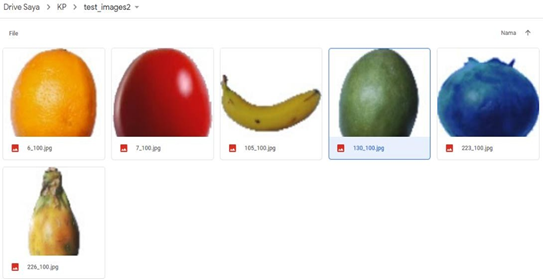

### Mengakses Lokasi Test Image 
Akses lokasi gambar yang akan di prediksi ada pada input di bawah ini , Untuk mendeteksi image, panggil fungsi read_image dan predict seperti pada input bagian memanggil fungsi predict. Secara otomatis akan mendeteksi pada file yang dituju.

In [ ]:
obj = Fruit('/content/drive/Mydrive/KP/test_image2')

### Memanggil fungsi Predict 

In [ ]:
obj.read_image()
obj.predict()

### Tampilan Deteksi Jenis Buah – buahan 

Output Hasil Deteksi dari file input di atas
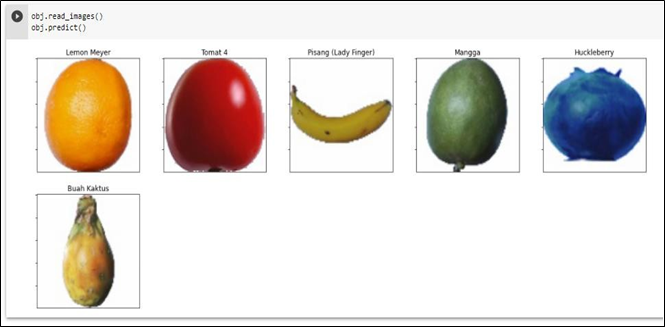

### Perhitungan Akurasi Deteksi 
Perhitungan akurasi sangatlah penting untuk melihat apakah deteksi buah berjalan dengan baik dan akurat, maka penulis ingin memberikan perhitungan ke akuratan deteksi.

- Rumus Perhitungan

Perhitungan dilakukan secara manual, rumus yang digunakan adalah 
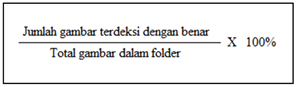

###  Gambar yang Diuji
Daftar Gambar yang Akan di uji
Data uji gambar adalah seperti pada Tabel di bawah ini. Total data yang diuji berjumlah 40 gambar buah yang dibagi menjadi 2 file (test_images, test_images2), masing - masing file berisi 20 gambar buah.

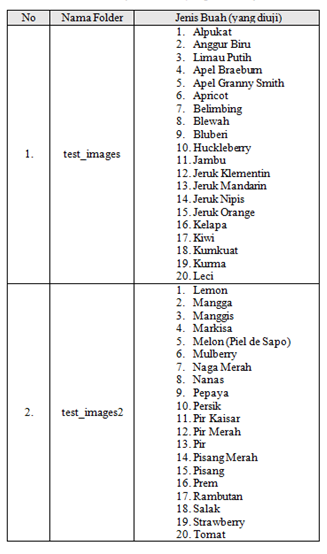

## Hasil Perhitungan
Hasil Tes Uji 
Hasil Perhitungan pada Tabel di bawah ini, terdapat 2 proses yaitu pada folder pertama dan kedua. Pada hasil uji gambar pada folder pertama memiliki akurasi 95%, dari 20 gambar uji hanya 1 yang mengalami kesalahan deteksi atau error yaitu pada gambar bluberi yang terdeteksi sebagai prem. sehingga dari 20 gambar terdapat 19 gambar yang terdeteksi secara benar menjadikan akurasi sebesar 95%. Sedangkan hasil uji pada folder kedua terdapat 3 gambar yang mengalami error atau kesalahan deteksi yaitu buah Pir merah dan buah Pisang Merah yang terdeteksi sebagai Pisang (Lady Finger) dan buah salak yang terdeteksi sebagai Kurma. Sehingga dari 20 gambar hanya 17 gambar yang terdeteksi dengan benar menjadikan akurasi sebesar 85%. Dari kedua folder yang masing – masing berisi 20 gambar uji akurasi. Memiliki hasil akurasi 95% dan 85% sehingga dihitung rata – rata nya menghasilkan rata – rata akurasi sebesar 90%.
 


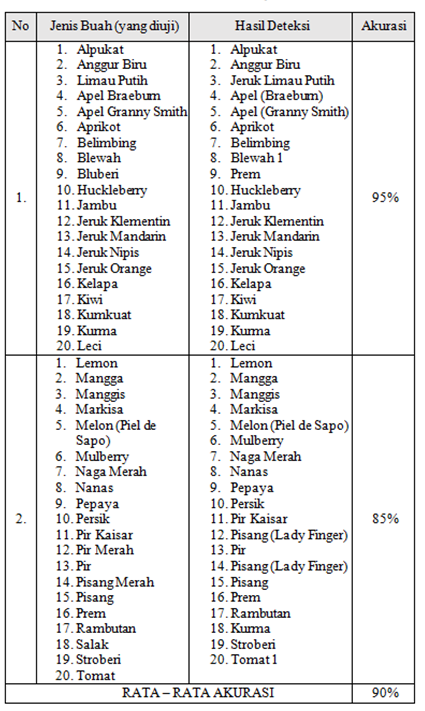

 Projek kali ini berhasil mengimplementasikan Deep Learning dengan metode CNN (Convolutional Neural Network) menggunakan Library Keras pada Jupyter notebook dengan jumlah data set sebanyak 67.692 gambar sebagai data training lalu sebanyak 22.688 sebagai data tes. Hasil uji deteksi dilakukan secara manual, menghasilkan rata - rata akurasi yang cukup tinggi yaitu 90% yang dapat dilihat pada Tabel di atas. Hasil error yang terjadi dipengaruhi dari jumlah data image yang di training dan variasi data image.